# Final Project Report

* Class: DS 5100
* Student Name: Hai Liu
* Student Net ID: hl9h
* This URL: 
  https://github.com/HaiL-DS/DS5100-finalproject/blob/main/DS51200_FinalProjectTemplate.ipynb

# Instructions

Follow the instructions in the Final Project isntructions notebook and put evidence of your work in this notebook.

Total points for each subsection under **Deliverables** and **Scenarios** are given in parentheses.

Breakdowns of points within subsections are specified within subsection instructions as bulleted lists.

This project is worth **50 points**.

# Deliverables

## The Monte Carlo Module (10)

- URL included, appropriately named (1).
- Includes all three specified classes (3).
- Includes at least all 12 specified methods (6; .5 each).

In [ ]:
Put the URL to your GitHub repo here.

Repo URL: https://github.com/HaiL-DS/DS5100-finalproject

Paste a copyy of your module here.

NOTE: Paste as text, not as code. Use triple backticks to wrap your code blocks.

In [ ]:
# A code block with your classes.
```
import numpy as np
import pandas as pd

class Die:
    """
    This is a “Die” class that can be any discrete random variable associated with a stochastic process, 
    such as using a deck of cards, flipping a coin, rolling an actual die, or speaking a language.
    """
    
    def __init__(self, sides=np.arange(1,7)):
        """Initalize the object by defining the number of faces and the default die weights.
           The initalizer takes a single argument of a NumPy array as the number of faces.
           The NumPy array’s data type may be strings or numbers, but the values must be distinct.
           By default, it internally initializes a die with 6 faces and weights of 1.0 for each face.
        """
        
        if not isinstance(sides, np.ndarray):     #check if argument is a NumPy array
            raise TypeError("Die sides must be a NumPy array!")
        elif len(sides) != len(set(sides)):       #check if array values are distinct 
            raise ValueError("Die side values must be distinct!")            
        else:
            self.sides = sides
            
        self.weights = np.ones(len(sides))
        self.die = pd.DataFrame({'sides': self.sides, 'weights': self.weights}).set_index('sides')
        
    def change_weight(self, face, weight):
        """A method to change the weight of a single side or face.
           It takes two arguments: the face value to be changed and its new weight.
        """
        
        if face not in list(self.die.index):     #check if the face passed is valid
            raise IndexError("This side of the die does not exist!")
        elif not isinstance(weight, (int, float)):     #check if the weight is a valid value type (integer or float)
            raise TypeError("Weight can only be numeric (integer or float)!")
        else:
            self.die.weights[self.die.index == face] = weight
            
    def roll_die(self, n=1):
        """A method to roll the die one or more times. Returning a Python list of outcomes
           It takes a parameter of how many times the die is to be rolled (defaults to 1).
           The function returns a Python list of outcomes (from random sampling with replacement by weights).
        """
        
        return list(pd.Series(self.die.index).sample(n, replace=True, weights=list(self.die.weights)).values)
    
    def die_status(self):
        """A method to show the die’s current state. It returns a copy of the private die data frame."""
        
        return self.die.copy()
        
        
class Game:
    """
    This is a "Game" class that consists of rolling of one or more similar dice (Die objects) one or more times.
    The class initalizer takes a single parameter, a list of already instantiated similar dice.
    The Game objects have a behavior to play a game, i.e. to roll all of the dice a given number of times, and
    only keep the results of their most recent play.
    """
    
    def __init__(self, dicelist):
        """
        Game initializer that takes a single parameter, a list of already instantiated similar dice.
        """
        
        for d in dicelist:
            if not isinstance(d, Die):    #check if parameter elements are Die objects                          
                raise TypeError("The list must contain Die objects!")    
            elif list(d.die.index) != list(dicelist[0].die.index):   #check if all Die objects have the same faces
                raise ValueError("Dice must have the same faces!") 
                
        self.dicelist = dicelist 
    
    def play(self, rolls):
        """
        A play method that takes an integer parameter to specify how many times the dice should be rolled.
        Results are saved to a private data frame in wide format, with the roll number as a named index, 
        columns for each die number (dice list index as column names), and the face rolled in that instance in each cell.
        """
        
        self.result = pd.DataFrame({'RollNo.': list(range(1, rolls+1))})
        for i in range(len(self.dicelist)):
            self.result[i+1] = self.dicelist[i].roll_die(rolls)
         
        self.resultdf = self.result.set_index("RollNo.")
    
    def show_result(self, form="wide"):
        """
        A method to show the user the results of the most recent play. It takes a parameter to return the data frame
        in "narrow" or "wide" form (defaults to "wide" for the form argument).
        """
        
        if form == "wide":
            return self.resultdf.copy()
        elif form == "narrow":
            narrowed = self.resultdf.copy().stack().to_frame('FaceRolled')
            narrowed.index.names = ['RollNo.', 'DieNo.']
            return narrowed
        else:
            raise ValueError("Passed an invalid option for the form of narrow or wide!")
            
    
class Analyzer:
    """
    An Analyzer object takes the results of a single game and computes various descriptive statistical properties about it.
    """
    
    def __init__(self, game):
        """
        Analyzer initializer that takes a game object as its input argument.
        """
        
        if not isinstance(game, Game):    #check if argument is a Game objects   
            raise ValueError("The argument must be a Game object!")  
        self.game = game
    
    def jackpot(self):
        """
        A jackpot method that computes how many times the game resulted in all faces being the same.
        It returns an integer as the number of jackpots.
        """
        
        gameresult = self.game.show_result(form = "wide")
        jps = 0
        for roll in range(len(gameresult)):
            if len(set(list(gameresult.iloc[roll, :]))) == 1:
                jps += 1
                
        return jps
            
    def face_count(self):
        """
        A face counts per roll method that computes how many times a given face is rolled in each event.
        It returns a data frame of results.
        """
        
        gameresultnarrow = self.game.show_result(form = "narrow")
        face_count = gameresultnarrow.reset_index().groupby("RollNo.")["FaceRolled"].value_counts().to_frame("Counts").unstack("FaceRolled")
        return face_count.fillna(0)
    

    def combo_count(self):
        """
        A combo count method that computes the distinct combinations of faces rolled, along with their counts.
        It returns a data frame of results.
        """
        
        gameresultnarrow = self.game.show_result(form = "narrow")
        facecombos = gameresultnarrow.groupby('RollNo.')["FaceRolled"].apply(list).to_frame("FaceCombos")["FaceCombos"].apply(sorted).reset_index()
        return facecombos["FaceCombos"].value_counts().to_frame('ComboCounts').sort_index()
    

    def permu_count(self):
        """
        An permutation count method that computes the distinct permutations of faces rolled, along with their counts.
        It returns a data frame of results.
        """
        
        gameresultnarrow = self.game.show_result(form = "narrow")
        facepermus = gameresultnarrow.groupby('RollNo.')["FaceRolled"].apply(list).to_frame("FacePermutations").reset_index()
        return facepermus["FacePermutations"].value_counts().to_frame("PermuCounts").sort_index()
    

```


## Unitest Module (2)

Paste a copy of your test module below.

NOTE: Paste as text, not as code. Use triple backticks to wrap your code blocks.

- All methods have at least one test method (1).
- Each method employs one of Unittest's Assert methods (1).

In [ ]:
# A code block with your test code.
```
import unittest
import numpy as np
import pandas as pd
from montecarlo.montecarlo import Die, Game, Analyzer


class MontecarloTestSuite(unittest.TestCase):
   
    def test_01_Die_init_if_error_raised(self): 
        """
        Test if Die's __init__() method successfully raises TypeError or ValueError
        if the input parameter is not a NumPy array or contains nondistinct values.
        """
        self.assertRaises(TypeError, Die, [1,2,3,4,5,6])   #check if TypeError raised
        self.assertRaises(ValueError, Die, np.array([1,1,1,4,5,6]))   #check if ValueError raised
    
    def test_02_Die_change_weight(self): 
        """
        Test if change_weight() method successfully changes the weight of a specific
        face of a die.
        """
        test_die = Die()
        test_die.change_weight(6, 9.0)  #change the weight of face 6 from 1.0 to 9.0.
        expected = 9.0
        self.assertEqual(test_die.die.weights[6], expected)     
                                 
    def test_03_Die_roll_die(self): 
        """
        Test if roll_die() method successfully genereates Python list of correct number of elements as outcomes.
        """
        test_die = Die()
        actual = test_die.roll_die(n=5)  #roll a die five times.
        expected = 5
        message = "roll_die() function did not return a list."
        self.assertTrue(isinstance(actual, list), message)   #check if the function returns a list
        self.assertEqual(len(actual), expected)   #check if the function returns correct number of results
        
    def test_04_Die_roll_die(self): 
        """
        Test if roll_die() method successfully genereates Python list of correct number of elements as outcomes.
        """
        test_die = Die()
        actual = test_die.roll_die(n=5)  #roll a die five times.
        expected = 5
        message = "roll_die() function did not return a list."
        self.assertTrue(isinstance(actual, list), message)   #check if the function returns a list
        self.assertEqual(len(actual), expected)   #check if the function returns correct number of results    
                                        
    def test_05_Die_die_status(self): 
        """
        Test if die_status() method successfully returns a Python Pandas DataFram showing the die’s current state.
        """
        test_die = Die()
        actual = test_die.die_status()
        message = "die_status() function did not return a data frame."
        self.assertTrue(isinstance(actual, pd.DataFrame), message)                               
    
    
    def test_06_Game_init_if_error_raised(self): 
        """
        Test if Game's __init__() method successfully raises TypeError or ValueError if the input parameter is not
        a list of instantiated die objects or not all of the dice have the same faces.
        """
        test_die1 = Die()  #instantiate three dice, first two dice have 6 faces, third one has 16.
        test_die2 = Die()
        test_die3 = Die(sides=np.arange(1,17))     
        self.assertRaises(TypeError, Game, ["Die1", "Die2", "Die3"])   #check if TypeError raised
        self.assertRaises(ValueError, Game, [test_die1, test_die2, test_die3])   #check if ValueError raised.
        
    def test_07_Game_play(self): 
        """
        Test if play() method successfully returns a Python Pandas DataFram showing correct game results.
        """
        test_die1 = Die()  #instantiate three dice
        test_die2 = Die()
        test_die3 = Die()
        test_game = Game([test_die1, test_die2, test_die3])  #instantiate a game object
        test_game.play(10)  #roll the three dice 10 times
        actual = test_game.resultdf
        expected_rolls = 10
        expected_dice = 3
        self.assertEqual(len(actual), expected_rolls)   #check if all roll reuslts are stored
        self.assertEqual(len(actual.columns), expected_dice)  #check if all die reuslts are stored                              
                                 
    def test_08_Game_show_result(self): 
        """
        Test if show_result() method returns correct forms of result data frames.
        """
        test_die1 = Die()  #instantiate three dice
        test_die2 = Die()
        test_die3 = Die()
        test_game = Game([test_die1, test_die2, test_die3])  #instantiate a game object
        test_game.play(10)  #roll the three dice 10 times
        actual_wide = test_game.show_result(form="wide")
        actual_narrow = test_game.show_result(form="narrow")
        message = "show_result() function did not return a data frame."
        self.assertTrue(isinstance(actual_wide, pd.DataFrame), message) 
        self.assertTrue(isinstance(actual_narrow, pd.DataFrame), message)           
        self.assertRaises(ValueError, test_game.show_result, " ")    #check if ValueError raised
  

    def test_09_Analyzer_init_if_error_raised(self): 
        """
        Test if Analyzer's __init__() method successfully raises a ValueError
        if the passed value is not a Game object.
        """
        self.assertRaises(ValueError, Analyzer, "Game")   #check if ValueError raised   
        
    def test_10_Analyzer_jackpot(self): 
        """
        Test if jackpot() method returns a integer.
        """
        test_die1 = Die()  #instantiate three dice
        test_die2 = Die()
        test_die3 = Die()
        test_game = Game([test_die1, test_die2, test_die3])  #instantiate a Game object
        test_game.play(10)  #roll the three dice 10 times
        test_analyzer1 = Analyzer(test_game)  #instantiate an Analyzer object                         
        actual = test_analyzer1.jackpot()  
        message = "jackpot() function did not return an integer."
        self.assertTrue(isinstance(actual, int), message)                         

    def test_11_Analyzer_face_count(self): 
        """
        Test if face_count() method returns a data frame with correct structure.
        """
        test_die1 = Die()  #instantiate three dice
        test_die2 = Die()
        test_die3 = Die()
        test_game = Game([test_die1, test_die2, test_die3])  #instantiate a Game object
        test_game.play(10)  #roll the three dice 10 times
        test_analyzer1 = Analyzer(test_game)  #instantiate an Analyzer object                         
        actual = test_analyzer1.face_count()
        expected_rolls = 10
        expected_faces = len(test_die1.die.index)                         
        self.assertEqual(len(actual), expected_rolls)   #check if all roll events are stored                        
        self.assertEqual(len(actual.columns), expected_faces)  #check if all roll faces are stored                       
                                 
                                                                                               
    def test_12_Analyzer_combo_count(self):
        """
        Test if combo_count() method returns a data frame with correct structure.
        """
        test_die1 = Die()  #instantiate three dice
        test_die2 = Die()
        test_die3 = Die()
        test_game = Game([test_die1, test_die2, test_die3])  #instantiate a Game object
        test_game.play(10)  #roll the three dice 10 times
        test_analyzer1 = Analyzer(test_game)  #instantiate an Analyzer object                         
        actual = test_analyzer1.combo_count()
        message = "combo_count() function did not return a data frame."
        self.assertTrue(isinstance(actual, pd.DataFrame), message)  #check if data frame returned

    
    def test_13_Analyzer_permu_count(self):
        """
        Test if combo_count() method returns a data frame with correct structure.
        """
        test_die1 = Die()  #instantiate three dice
        test_die2 = Die()
        test_die3 = Die()
        test_game = Game([test_die1, test_die2, test_die3])  #instantiate a Game object
        test_game.play(10)  #roll the three dice 10 times
        test_analyzer1 = Analyzer(test_game)  #instantiate an Analyzer object                         
        actual = test_analyzer1.permu_count()
        message = "permu_count() function did not return a data frame."
        self.assertTrue(isinstance(actual, pd.DataFrame), message)  #check if data frame returned 
         
 
                                 
if __name__ == '__main__':
    
    unittest.main(verbosity=3)
```


## Unittest Results (3)

Put a copy of the results of running your tests from the command line here.

Again, paste as text using triple backticks.

- All 12 specified methods return OK (3; .25 each).

In [ ]:
# A text block with the output of a successful test.
```
-bash-4.4$ python montecarlo_test.py
Welcome to Hai's package of montecarlo!
test_01_Die_init_if_error_raised (__main__.MontecarloTestSuite.test_01_Die_init_if_error_raised)
Test if Die's __init__() method successfully raises TypeError or ValueError ... ok
test_02_Die_change_weight (__main__.MontecarloTestSuite.test_02_Die_change_weight)
Test if change_weight() method successfully changes the weight of a specific ... ok
test_03_Die_roll_die (__main__.MontecarloTestSuite.test_03_Die_roll_die)
Test if roll_die() method successfully genereates Python list of correct number of elements as outcomes. ... ok
test_04_Die_roll_die (__main__.MontecarloTestSuite.test_04_Die_roll_die)
Test if roll_die() method successfully genereates Python list of correct number of elements as outcomes. ... ok
test_05_Die_die_status (__main__.MontecarloTestSuite.test_05_Die_die_status)
Test if die_status() method successfully returns a Python Pandas DataFram showing the die’s current state. ... ok
test_06_Game_init_if_error_raised (__main__.MontecarloTestSuite.test_06_Game_init_if_error_raised)
Test if Game's __init__() method successfully raises TypeError or ValueError if the input parameter is not ... ok
test_07_Game_play (__main__.MontecarloTestSuite.test_07_Game_play)
Test if play() method successfully returns a Python Pandas DataFram showing correct game results. ... ok
test_08_Game_show_result (__main__.MontecarloTestSuite.test_08_Game_show_result)
Test if show_result() method returns correct forms of result data frames. ... ok
test_09_Analyzer_init_if_error_raised (__main__.MontecarloTestSuite.test_09_Analyzer_init_if_error_raised)
Test if Analyzer's __init__() method successfully raises a ValueError ... ok
test_10_Analyzer_jackpot (__main__.MontecarloTestSuite.test_10_Analyzer_jackpot)
Test if jackpot() method returns a integer. ... ok
test_11_Analyzer_face_count (__main__.MontecarloTestSuite.test_11_Analyzer_face_count)
Test if face_count() method returns a data frame with correct structure. ... ok
test_12_Analyzer_combo_count (__main__.MontecarloTestSuite.test_12_Analyzer_combo_count)
Test if combo_count() method returns a data frame with correct structure. ... ok
test_13_Analyzer_permu_count (__main__.MontecarloTestSuite.test_13_Analyzer_permu_count)
Test if combo_count() method returns a data frame with correct structure. ... ok

----------------------------------------------------------------------
Ran 13 tests in 0.033s

OK
```

## Import (1)

Import your module here. This import should refer to the code in your package directory.

- Module successuflly imported (1).

In [1]:
# e.g. import montecarlo.montecarlo 

from montecarlo import montecarlo

die1 = montecarlo.Die()
die1.roll_die(6)

Welcome to Hai's package of montecarlo!


[2, 5, 4, 6, 3, 3]

## Help Docs (4)

Show your docstring documentation by applying `help()` to your imported module.

- All methods have a docstring (3; .25 each).
- All classes have a docstring (1; .33 each).

In [2]:
# help(montecarlo)
help(montecarlo)

Help on module montecarlo.montecarlo in montecarlo:

NAME
    montecarlo.montecarlo

CLASSES
    builtins.object
        Analyzer
        Die
        Game
    
    class Analyzer(builtins.object)
     |  Analyzer(game)
     |  
     |  An Analyzer object takes the results of a single game and computes various descriptive statistical properties about it.
     |  
     |  Methods defined here:
     |  
     |  __init__(self, game)
     |      Analyzer initializer that takes a game object as its input argument.
     |  
     |  combo_count(self)
     |      A combo count method that computes the distinct combinations of faces rolled, along with their counts.
     |      It returns a data frame of results.
     |  
     |  face_count(self)
     |      A face counts per roll method that computes how many times a given face is rolled in each event.
     |      It returns a data frame of results.
     |  
     |  jackpot(self)
     |      A jackpot method that computes how many times the game

## `README.md` File (3)

Provide link to the README.md file of your project's repo.

- Metadata section or info present (1).
- Synopsis section showing how each class is called (1). (All must be included.)
- API section listing all classes and methods (1). (All must be included.)

URL: https://github.com/HaiL-DS/DS5100-finalproject/blob/main/README.md

## Successful installation (2)

Put a screenshot or paste a copy of a terminal session where you successfully install your module with pip.

If pasting text, use a preformatted text block to show the results.

- Installed with `pip` (1).
- Successfully installed message appears (1).

In [ ]:
# Pasted code
```
-bash-4.4$ pip install .
Defaulting to user installation because normal site-packages is not writeable
Processing /sfs/gpfs/tardis/home/hl9h/MSDS/DS5100/DS5100-finalproject
  Preparing metadata (setup.py) ... done
Building wheels for collected packages: montecarlo
  Building wheel for montecarlo (setup.py) ... done
  Created wheel for montecarlo: filename=montecarlo-1.0-py3-none-any.whl size=4549 sha256=5bd87682c530a98a093588f59976dd25ad585e4320082fdb26b55f90b2f7aa2b
  Stored in directory: /sfs/gpfs/tardis/home/hl9h/.cache/pip/wheels/04/0c/9e/157caeadb757fb944339774c713d7095a3a7e71633481267a0
Successfully built montecarlo
Installing collected packages: montecarlo
Successfully installed montecarlo-1.0

```


# Scenarios

Use code blocks to perform the tasks for each scenario.

Be sure the outputs are visible before submitting.

## Scenario 1: A 2-headed Coin (9)

Task 1. Create a fair coin (with faces $H$ and $T$) and one unfair coin in which one of the faces has a weight of $5$ and the others $1$.

- Fair coin created (1).
- Unfair coin created with weight as specified (1).

In [7]:
import numpy as np
import pandas as pd
from montecarlo.montecarlo import Die, Game, Analyzer

fair = Die(sides=np.array(["H", "T"]))
unfair = Die(sides=np.array(["H", "T"]))
unfair.change_weight("H", 5)


Task 2. Play a game of $1000$ flips with two fair dice.

- Play method called correclty and without error (1).

In [8]:
game_2fair = Game([fair, fair])
game_2fair.play(1000)


Task 3. Play another game (using a new Game object) of $1000$ flips, this time using two unfair dice and one fair die. For the second unfair die, you can use the same die object twice in the list of dice you pass to the Game object.

- New game object created (1).
- Play method called correclty and without error (1).

In [9]:
game_2unfair_1fair = Game([unfair, unfair, fair])
game_2unfair_1fair.play(1000)


Task 4. For each game, use an Analyzer object to determine the raw frequency of jackpots — i.e. getting either all $H$s or all $T$s.

- Analyzer objecs instantiated for both games (1).
- Raw frequencies reported for both (1).

In [11]:
analyzer_2fair = Analyzer(game_2fair)
analyzer_2unfair_1fair = Analyzer(game_2unfair_1fair)

print(f"The raw frequency of jackpots for a game of 1000 flips with two fair dice: \
     {analyzer_2fair.jackpot()}." )

print(f"The raw frequency of jackpots for a game of 1000 flips with two unfair dice and one fair die: \
     {analyzer_2unfair_1fair.jackpot()}." )


The raw frequency of jackpots for a game of 1000 flips with two fair dice: 481.
The raw frequency of jackpots for a game of 1000 flips with two unfair dice and one fair die: 356.


Task 5. For each analyzer, compute relative frequency as the number of jackpots over the total number of rolls.

- Both relative frequencies computed (1).

In [12]:
print(f"The relative frequency of jackpots for a game of 1000 flips with two fair dice: \
     {analyzer_2fair.jackpot()/1000}." )

print(f"The relative frequency of jackpots for a game of 1000 flips with two unfair dice and one fair die: \
     {analyzer_2unfair_1fair.jackpot()/1000}." )


The relative frequency of jackpots for a game of 1000 flips with two fair dice: 0.481.
The relative frequency of jackpots for a game of 1000 flips with two unfair dice and one fair die: 0.356.


Task 6. Show your results, comparing the two relative frequencies, in a simple bar chart.

- Bar chart plotted and correct (1).

<Axes: xlabel='Game'>

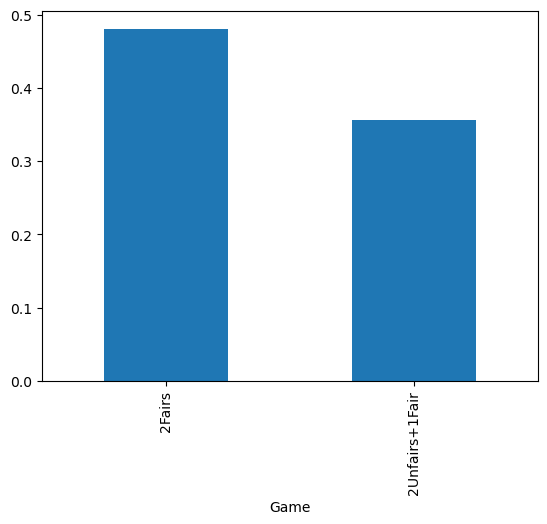

In [19]:
compares = pd.DataFrame({"Game": ['2Fairs', '2Unfairs+1Fair'],"Relative Freq.": \
                         [analyzer_2fair.jackpot()/1000, analyzer_2unfair_1fair.jackpot()/1000]}).set_index("Game")

compares["Relative Freq."].plot.bar()


## Scenario 2: A 6-sided Die (9)

Task 1. Create three dice, each with six sides having the faces 1 through 6.

- Three die objects created (1).

In [24]:
die1 = Die()  # by default, the Die object is created with faces 1 through 6
die2 = Die()
die3 = Die()

die1.die

,weights
sides,
1,1.0
2,1.0
3,1.0
4,1.0
5,1.0
6,1.0


Task 2. Convert one of the dice to an unfair one by weighting the face $6$ five times more than the other weights (i.e. it has weight of 5 and the others a weight of 1 each).

- Unfair die created with proper call to weight change method (1).

In [25]:
die3.change_weight(6, 5)  #convert die3 to an unfair die at face6

die3.die

,weights
sides,
1,1.0
2,1.0
3,1.0
4,1.0
5,1.0
6,5.0


Task 3. Convert another of the dice to be unfair by weighting the face $1$ five times more than the others.

- Unfair die created with proper call to weight change method (1).

In [26]:
die2.change_weight(1, 5)  #convert die2 to an unfair die at face1

die2.die

,weights
sides,
1,5.0
2,1.0
3,1.0
4,1.0
5,1.0
6,1.0


Task 4. Play a game of $10000$ rolls with $5$ fair dice.

- Game class properly instantiated (1). 
- Play method called properly (1).

In [27]:
game_5fair = Game([die1, die1, die1, die1, die1])
game_5fair.play(10000)


Task 5. Play another game of $10000$ rolls, this time with $2$ unfair dice, one as defined in steps #2 and #3 respectively, and $3$ fair dice.

- Game class properly instantiated (1). 
- Play method called properly (1).

In [28]:
game_3fair2unfair = Game([die3, die2, die1, die1, die1])
game_3fair2unfair.play(10000)


Task 6. For each game, use an Analyzer object to determine the relative frequency of jackpots and show your results, comparing the two relative frequencies, in a simple bar chart.

- Jackpot methods called (1).
- Graph produced (1).

<Axes: xlabel='Game'>

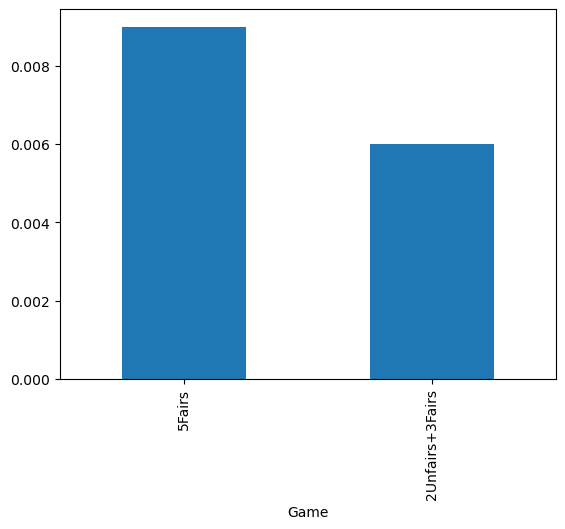

In [30]:
analyzer_5fair = Analyzer(game_5fair)
analyzer_3fair2unfair = Analyzer(game_3fair2unfair)

compares2 = pd.DataFrame({"Game": ['5Fairs', '2Unfairs+3Fairs'],"Relative Freq.": \
                          [analyzer_5fair.jackpot()/1000, analyzer_3fair2unfair.jackpot()/1000]}).set_index("Game")

compares2["Relative Freq."].plot.bar()


## Scenario 3: Letters of the Alphabet (7)

Task 1. Create a "die" of letters from $A$ to $Z$ with weights based on their frequency of usage as found in the data file `english_letters.txt`. Use the frequencies (i.e. raw counts) as weights.

- Die correctly instantiated with source file data (1).
- Weights properly applied using weight setting method (1).

In [39]:
alphabet = [chr(i) for i in range(65, 91)]  #get all the faces/sides of the "die"

letter_wts = pd.read_csv('english_letters.txt', header = None, sep =' ' )   #get the data frame for weights
letter_wts.columns = ["Letter", "Weight"]

letter_die = Die(np.array(alphabet))  #instantiate the Die object

for face in letter_die.die.index:   #set die weights for each face/side
    letter_die.change_weight(face, int(letter_wts.loc[letter_wts.Letter == face, 'Weight'].iloc[0]))
    
letter_die.die  #check on the die


,weights
sides,
A,374061888.0
B,70195826.0
C,138416451.0
D,169330528.0
E,529117365.0
F,95422055.0
G,91258980.0
H,216768975.0
I,320410057.0


Task 2. Play a game involving $4$ of these dice with $1000$ rolls.

- Game play method properly called (1).

In [42]:
game_4letterdice = Game([letter_die, letter_die, letter_die, letter_die])
game_4letterdice.play(1000)


Task 3. Determine how many permutations in your results are actual English words, based on the vocabulary found in `scrabble_words.txt`.

- Use permutation method (1).
- Get count as difference between permutations and vocabulary (1).

In [50]:
with open("scrabble_words.txt", 'r') as words:
    vocabulary = [word.strip() for word in words.readlines()]   #generate a list of vocabulary

analyzer_4letterdice = Analyzer(game_4letterdice)  #instantiate the Analyzer object

permutations = analyzer_4letterdice.permu_count()  #get the permutations and turn them into a list 
permu_list = []
for p in permutations.index:
    permu_list.append("".join(p))

word_matches = set(permu_list).intersection(set(vocabulary))  #find word matches in the vocabulary

print(f"Out of {len(permu_list)} permutations in my results, there are {len(word_matches)} actual English words,\n \
      based on the comparision with a vocabulary with a size of {len(vocabulary)}.")


Out of 989 permutations in my results, there are 47 actual English words,
 based on the comparision to a vocabulary with a size of 279496.


Task 4. Repeat steps #2 and #3, this time with $5$ dice. How many actual words does this produce? Which produces more?

- Successfully repreats steps (1).
- Identifies parameter with most found words (1).

In [51]:
game_5letterdice = Game([letter_die, letter_die, letter_die, letter_die, letter_die])
game_5letterdice.play(1000)

analyzer_5letterdice = Analyzer(game_5letterdice)  #instantiate the Analyzer object

permutations_5dice = analyzer_5letterdice.permu_count()  #get the permutations and turn them into a list 
permu_list_5dice = []
for p in permutations_5dice.index:
    permu_list_5dice.append("".join(p))

word_matches_5dice = set(permu_list_5dice).intersection(set(vocabulary))  #find word matches in the vocabulary

print(f"Out of {len(permu_list_5dice)} permutations in my results with 5 dice, there are {len(word_matches_5dice)} actual English words,\n \
based on the comparision with a vocabulary with a size of {len(vocabulary)}.")


Out of 1000 permutations in my results with 5 dice, there are 5 actual English words,
 based on the comparision to a vocabulary with a size of 279496.


In [ ]:
# The game with 4 dice actually produced more words than that with 5 dice.